## Data dimensionality

In [1]:
''' Dependencies '''
from sklearn.decomposition import PCA
from tqdm.auto import tqdm
import warnings
import pandas as pd
import numpy as np
import scipy
import sys
import statsmodels.api as sm
from tqdm import tqdm as pbar

# my scripts
from pyaldata import * 
import preprocess
from utils import *

# Plotting
from IPython.display import display, set_matplotlib_formats, HTML
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.colors
import matplotlib.pyplot as plt
import seaborn as sns

cs = ['#43D789', '#801607', '#8DB8ED', '#94B0B6', '#e42c12', '#005CA8', '#127340', '#111851'] # Line colors
cmap = matplotlib.colors.ListedColormap(['#ff9c8d', '#dafce3']) # Color for False and True

sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style('ticks', rc={ 'figure.facecolor': 'none', 'axes.facecolor':'none'})
sns.set_context('notebook', rc={'lines.linewidth':1.5})

%config InlineBackend.figure_format = 'retina'

/Users/Daphne/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
''' Load dictionaries '''

main_dict = np.load('/Users/Daphne/Data/main_dict.npy', allow_pickle='TRUE').item()
evar_to_pcs = np.load('evar_to_pcs.npy') # Convert vare to dims

In [3]:
''' Parameters '''

MONKEY_C = 8
MONKEY_M = 7
THRESHOLDS_VARE = np.round(np.arange(0.2, 0.95, 0.025), 3)
total_n_sessions = [main_dict[s]['pcs'].shape[0] for s in main_dict.keys()]
dims_normalized = [evar_to_pcs[i, :] / total_n_sessions[i] for i in range(len(total_n_sessions))]

df1 = pd.DataFrame({'Recorded units': total_n_sessions[:MONKEY_C]})
df1['Monkey'] = 'C' 
df2 = pd.DataFrame({'Recorded units': total_n_sessions[MONKEY_C:]})
df2['Monkey'] = 'M' 
df = pd.concat([df1, df2])

In [5]:
import tensortools as tt

In [29]:
P = main_dict['2016-09-09']['df']['both_rates'].shape[0]
N = main_dict['2016-09-09']['df']['both_rates'][0].shape[1]
T = main_dict['2016-09-09']['df']['both_rates'][1].shape[0]

print(N, T, P)

218 105 213


In [33]:
main_dict['2016-09-09']['df']['both_rates'][p]

array([[ 0.        , 10.37193324,  8.03116627, ..., 14.03731919,
         0.        ,  2.62934748],
       [ 0.        , 14.03731919, 13.14440455, ..., 19.00743364,
         0.        ,  5.40181879],
       [ 0.        , 16.66666667, 15.48517152, ..., 22.06848545,
         0.        ,  7.74258576],
       ...,
       [ 0.89291464,  5.40181879,  7.74258576, ...,  8.03116627,
         0.        ,  0.        ],
       [ 0.        ,  2.62934748,  7.74258576, ...,  8.6355004 ,
         0.        ,  0.        ],
       [ 0.        ,  0.89291464,  5.40181879, ...,  7.74258576,
         0.        ,  0.        ]])

In [34]:
tmp = []

for p in range(P):
    tmp.append(main_dict['2016-09-09']['df']['both_rates'][p])
    
tmp = np.array(tmp)

In [39]:
#tmp.reshape((N, T, P))

In [346]:
data =   # specify a numpy array holding the tensor you wish to fit

# Fit an ensemble of models, 4 random replicates / optimization runs per model rank
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(data, ranks=range(1, 9), replicates=4)

fig, axes = plt.subplots(1, 2)
tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
fig.tight_layout()

# Plot the low-d factors for an example model, e.g. rank-2, first optimization run / replicate.
num_components = 2
replicate = 0
tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

plt.show()

SyntaxError: invalid syntax (<ipython-input-346-e52c57b3adee>, line 3)

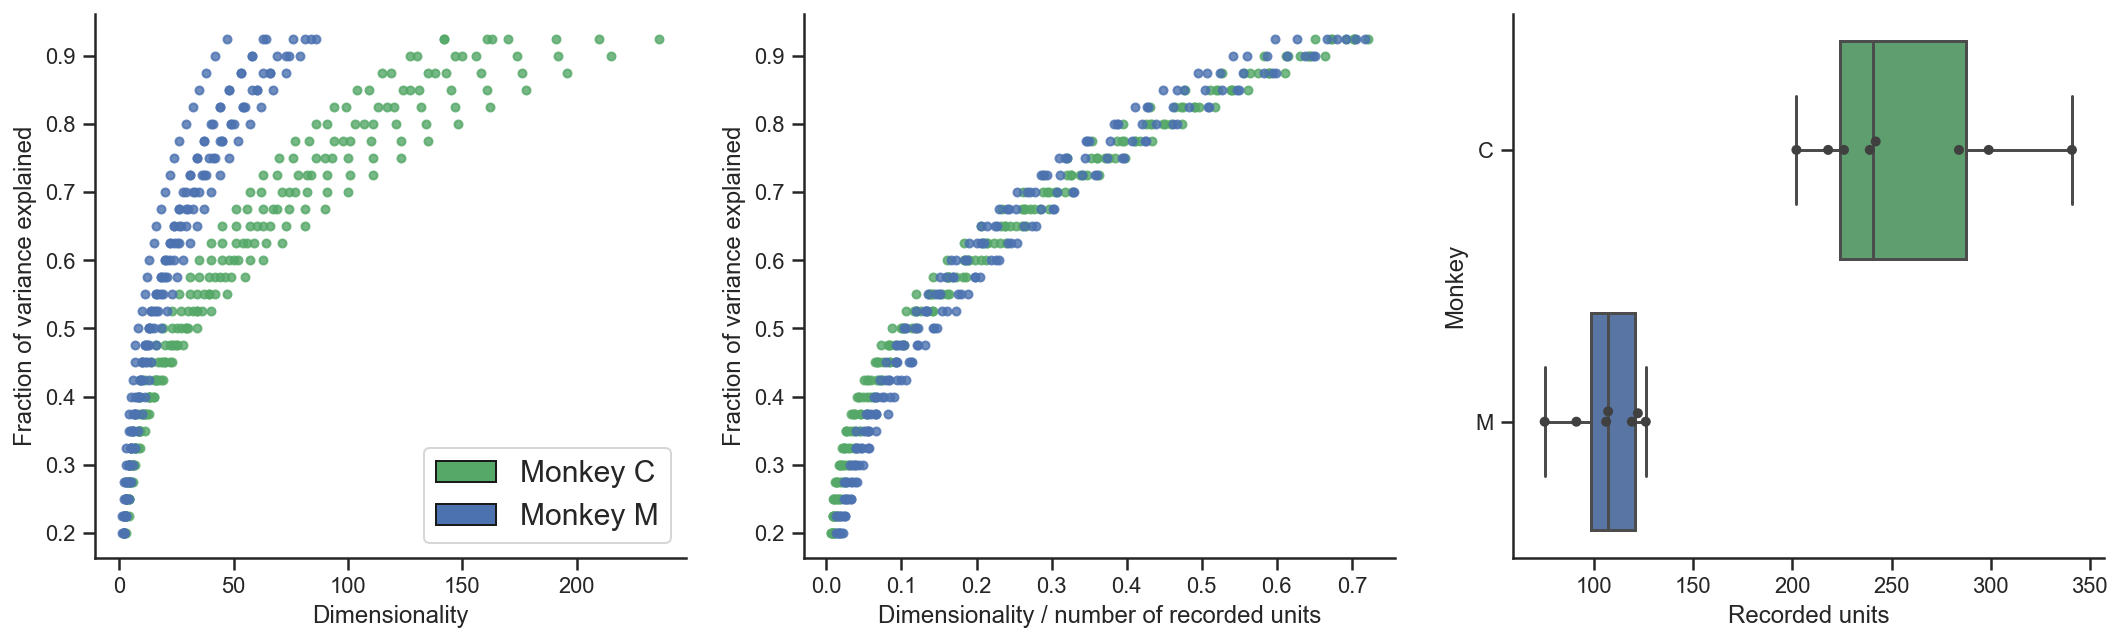

In [326]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, v in enumerate(evar_to_pcs[:MONKEY_C]): axs[0].plot(v, THRESHOLDS_VARE, '.', c='g', ms=8, alpha=0.8)
for i, v in enumerate(evar_to_pcs[MONKEY_C:]): axs[0].plot(v, THRESHOLDS_VARE, '.', c='b', ms=8, alpha=0.8)
    
for i, v in enumerate(dims_normalized[:MONKEY_C]): axs[1].plot(v, THRESHOLDS_VARE, '.', c='g', ms=8, alpha=0.8)
for i, v in enumerate(dims_normalized[MONKEY_C:]): axs[1].plot(v, THRESHOLDS_VARE, '.', c='b', ms=8, alpha=0.8)
    
axs[0].set_xlabel('Dimensionality')
axs[0].set_ylabel('Fraction of variance explained')

axs[1].set_xlabel('Dimensionality / number of recorded units')
axs[1].set_ylabel('Fraction of variance explained')

legend_elements = [Patch(facecolor='g', edgecolor='k', label='Monkey C'),
                   Patch(facecolor='b', edgecolor='k', label='Monkey M'),]
axs[0].legend(handles=legend_elements, prop={'size': 15}, loc=4)

sns.boxplot(x='Recorded units', y='Monkey', data=df, palette=['g', 'b'])
sns.swarmplot(x='Recorded units', y='Monkey', data=df, color='.25')
    
sns.despine()

In [327]:
main_dict[s]['df'].columns

Index(['monkey', 'date', 'task', 'target_direction', 'trial_id', 'result',
       'bin_size', 'perturbation', 'perturbation_info', 'epoch',
       'idx_trial_start', 'idx_target_on', 'idx_go_cue', 'idx_movement_on',
       'idx_peak_speed', 'idx_trial_end', 'pos', 'vel', 'acc', 'force',
       'M1_spikes', 'M1_unit_guide', 'PMd_spikes', 'PMd_unit_guide',
       'both_spikes', 'M1_rates', 'PMd_rates', 'both_rates'],
      dtype='object')

In [328]:
main_dict[s]['df']['both_rates'][5].shape

(159, 107)

In [331]:
aligned_td = restrict_to_interval(main_dict[s]['df'], 'idx_go_cue', end_point_name='idx_trial_end')

In [ ]:
aligned_td

In [332]:
print("first trial's length in full:", main_dict[s]['df'].both_rates[0].shape)
print("first trial's length in the new dataframe:", aligned_td.both_rates[0].shape)

first trial's length in full: (352, 107)
first trial's length in the new dataframe: (51, 107)


In [335]:
aligned_td.both_rates.shape

(215,)

In [343]:
for i in range(aligned_td.both_rates.shape[0]):
    print(aligned_td.both_rates[i].shape)

(51, 107)
(48, 107)
(45, 107)
(48, 107)
(49, 107)
(41, 107)
(42, 107)
(40, 107)
(44, 107)
(39, 107)
(41, 107)
(45, 107)
(40, 107)
(42, 107)
(48, 107)
(43, 107)
(40, 107)
(42, 107)
(58, 107)
(47, 107)
(47, 107)
(46, 107)
(43, 107)
(43, 107)
(40, 107)
(40, 107)
(42, 107)
(42, 107)
(41, 107)
(42, 107)
(47, 107)
(31, 107)
(45, 107)
(43, 107)
(41, 107)
(45, 107)
(55, 107)
(44, 107)
(43, 107)
(37, 107)
(44, 107)
(45, 107)
(41, 107)
(43, 107)
(44, 107)
(41, 107)
(40, 107)
(43, 107)
(42, 107)
(42, 107)
(44, 107)
(39, 107)
(40, 107)
(43, 107)
(46, 107)
(44, 107)
(45, 107)
(39, 107)
(41, 107)
(43, 107)
(55, 107)
(41, 107)
(43, 107)
(44, 107)
(40, 107)
(43, 107)
(46, 107)
(43, 107)
(47, 107)
(42, 107)
(38, 107)
(41, 107)
(44, 107)
(44, 107)
(44, 107)
(46, 107)
(44, 107)
(43, 107)
(43, 107)
(44, 107)
(42, 107)
(42, 107)
(42, 107)
(47, 107)
(42, 107)
(40, 107)
(41, 107)
(44, 107)
(43, 107)
(41, 107)
(40, 107)
(38, 107)
(42, 107)
(41, 107)
(40, 107)
(42, 107)
(49, 107)
(42, 107)
(44, 107)
(43, 107)


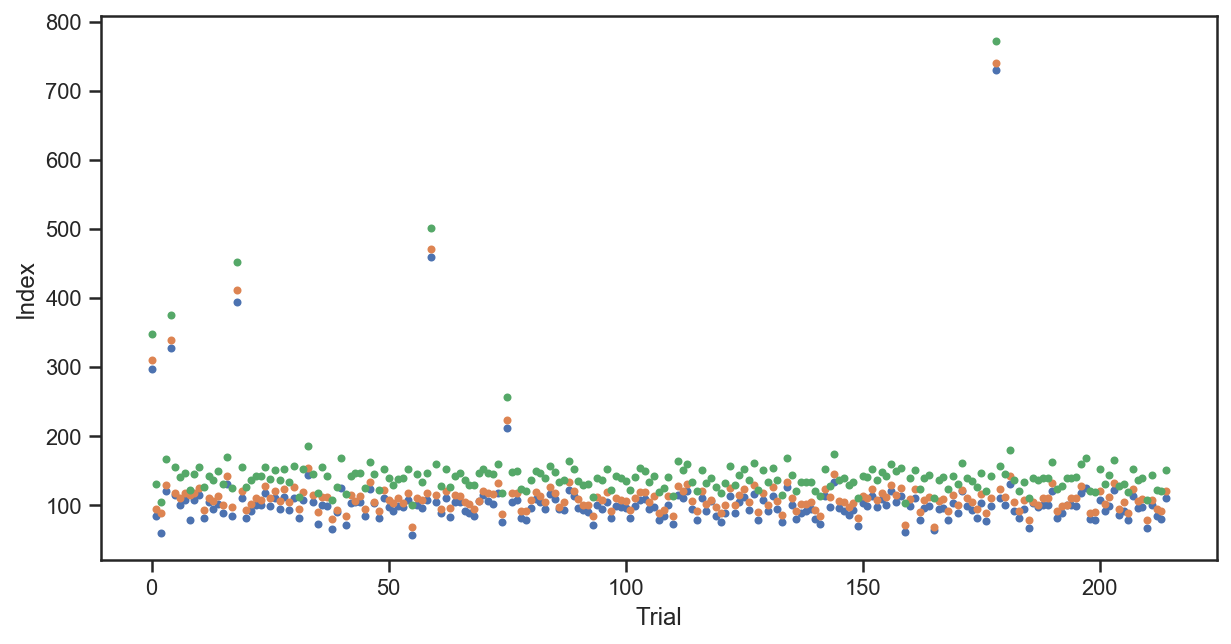

In [314]:
plt.plot(main_dict[s]['df']['idx_go_cue'], '.')
plt.plot(main_dict[s]['df']['idx_movement_on'], '.')
plt.plot(main_dict[s]['df']['idx_trial_end'], '.')
plt.xlabel('Trial')
plt.ylabel('Index');

In [306]:
plt.plot(main_dict[s]['df']['idx_go_cue'], '.')

0      310.0
1       94.0
2       89.0
3      129.0
4      339.0
       ...  
210     78.0
211    108.0
212     95.0
213     92.0
214    121.0
Name: idx_movement_on, Length: 215, dtype: float64

In [180]:
sum(lambdas)**2

86044518.71566266

In [339]:
T_cutoffs = [] # Minimum number of timepoints per session

for s in main_dict.keys():
    P = main_dict[s]['df']['both_rates'].shape[0]  
    T_cutoffs.append(min([main_dict[s]['df']['both_rates'][p].shape[0] for p in range(P)]))

In [340]:
''' Get trial averaged data for each session '''

X_tmp = []
X_avg_sessions = []

for i, s in enumerate(main_dict.keys()):
    
    N = main_dict[s]['df']['both_rates'][0].shape[1] # Neurons
    T = main_dict[s]['df']['both_rates'][0].shape[0] # Timepoints
    P = main_dict[s]['df']['both_rates'].shape[0] # Trials

    X_tmp = []
    for p in range(P):
        X_tmp.append(main_dict[s]['df']['both_rates'][p][:T_cutoffs[i], :])
    X_tmp = np.array(X_tmp)
    
    #print(X_tmp.shape)
    
    # Average across trials and store
    X_avg_sessions.append(np.mean(X_tmp, axis=0))

X_avg_sessions = np.array(X_avg_sessions)

In [341]:
X_avg_sessions[3].shape

(89, 242)

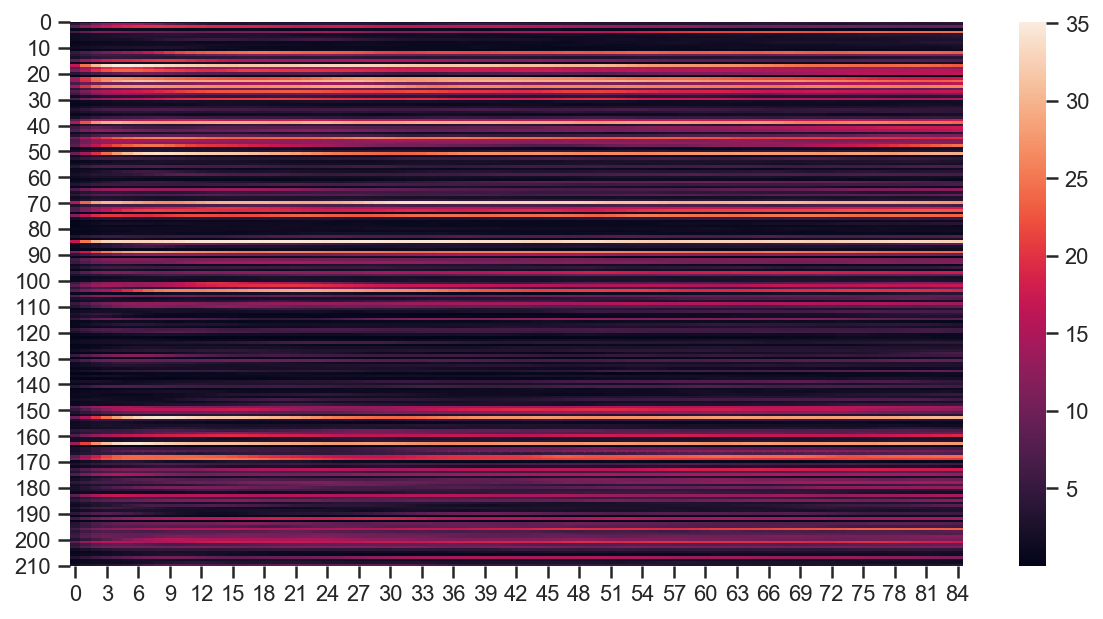

In [342]:
sns.heatmap(X_avg_sessions[0].T)

In [294]:
X_avg_sessions[0].shape[1]

(85, 218)

In [295]:
model = PCA(n_components=X_avg_sessions[0].shape[1])
model.fit(X_avg_sessions[0].T)

ValueError: n_components=218 must be between 0 and min(n_samples, n_features)=85 with svd_solver='full'

In [252]:
model.components_.

(85, 107)

In [183]:
for s in main_dict.keys():

    lambdas = main_dict[s]['model'].explained_variance_

    D = 0
    for lam in range(len(lambdas)):
        D += lam**2

    print(D / (sum(lambdas)**2) * 100)

3.9859424530382035
3.167367693461704
5.116701272737316
3.5467852838680667
3.944304774050939
4.031258238806011
3.1753198270398597
2.6454243725875277
1.776643436196584
2.642074259296353
1.9775011961702127
3.6709358456136196
3.7116438442955917
1.843452936393045
2.7090088213547223


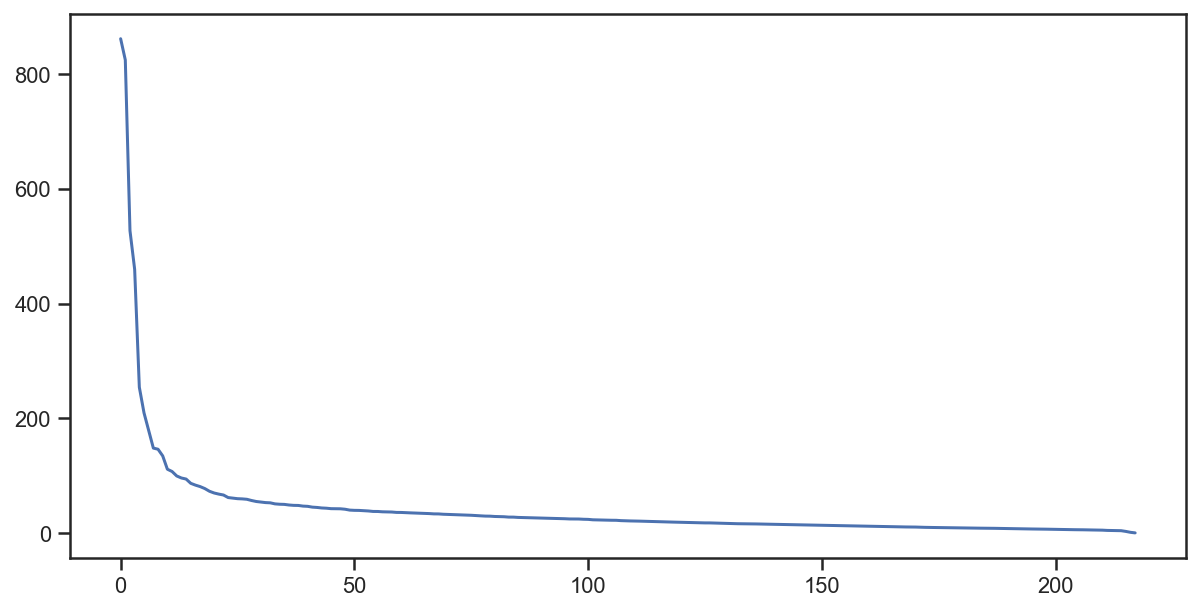

In [174]:
plt.plot(main_dict['2016-09-09']['model'].explained_variance_)

In [159]:
dims_normalized

[array([0.00917431, 0.00917431, 0.01376147, 0.01376147, 0.01834862,
        0.02293578, 0.02752294, 0.03669725, 0.0412844 , 0.05045872,
        0.06422018, 0.0733945 , 0.08715596, 0.10550459, 0.11926606,
        0.14220183, 0.16055046, 0.18348624, 0.20642202, 0.23394495,
        0.26146789, 0.28899083, 0.32110092, 0.35321101, 0.39449541,
        0.43119266, 0.47706422, 0.52752294, 0.58256881, 0.65137615]),
 array([0.00884956, 0.00884956, 0.01327434, 0.01769912, 0.02212389,
        0.03097345, 0.03539823, 0.04424779, 0.05752212, 0.07079646,
        0.0840708 , 0.10176991, 0.11946903, 0.14159292, 0.16371681,
        0.18584071, 0.21238938, 0.23893805, 0.26548673, 0.29646018,
        0.32743363, 0.36283186, 0.39823009, 0.43362832, 0.47345133,
        0.51769912, 0.5619469 , 0.61061947, 0.66371681, 0.72123894]),
 array([0.0058651 , 0.00879765, 0.00879765, 0.01173021, 0.01759531,
        0.02052786, 0.02639296, 0.03519062, 0.04398827, 0.05571848,
        0.06744868, 0.08211144, 0.09970674, 